## MAE 6286 HW1       Implement the Solution                       Lingfeng Gao

In [83]:
import math
import numpy


m_s = 50  # Weight of the rocket shell, kg
g = 9.81  # m/s^2
rho = 1.091  # average air density, kg/m^3
r = 0.5  # m
A = math.pi * r * r  # m^2
v_e = 350  # m/s
C_D = 0.21  # Drag coefficient
mp0 = 150  # kg

def mp(t):
    if t < 4:
        mpt = 20
        total = 150 - mpt * t
    else:
        mpt = 0
        total = 150 - 4*20 - mpt * t
    return total


def rhs_phugoid(t, u, m_s, g, rho, A, v_e, C_D, mp, mp1):
    h, v = u
    rhs = numpy.array([v,-g + mp1(t) * v_e / (m_s + mp(t)) - 0.5 * rho * v * numpy.abs(v) * A * C_D / (m_s + mp(t))])
    return rhs

def rk2_step(t, u, f, delta_t, *args):
    u_s = u + 0.5 * delta_t * f(t, u, *args)
    
    u_n = u + delta_t * f(t + 0.5*delta_t, u_s, *args)
    
    return u_n

T = 50
delta_t = 0.05  # s


u_rk2 = numpy.empty((N,2))
u_rk2[0] = numpy.array([h0,v0])
t = []

for n in range(N-1):
    u_rk2[n + 1] = rk2_step(n*delta_t, u_rk2[n], rhs_phugoid, delta_t,m_s, g, rho, A, v_e, C_D, mp, mp1 )
    t.append(n * delta_t)
    
t.append(T)
t = numpy.array(t)

v_rk2 = u_rk2[:, 1]
h_rk2 = u_rk2[:, 0]

print(v_rk2)
print(h_rk2)

[   0.            1.26387702    2.53651956 ... -113.92261237 -113.92656214
 -113.93047832]
[ 0.00000000e+00  3.14875000e-02  1.26387798e-01 ... -2.44087882e+03
 -2.44657505e+03 -2.45227148e+03]


## Assessment

## Q1

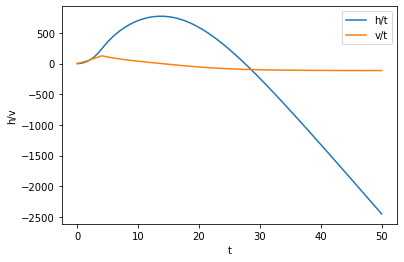

In [54]:
pyplot.xlabel('t')  # s
pyplot.ylabel('h/v')  # m/s
pyplot.plot(t, h_rk2,label='h/t')
pyplot.plot(t, v_rk2,label='v/t')

pyplot.legend();

## Q2   t = 15.2 s

In [55]:
t = 15.2

mp(15.2)

70.0

## Q3 v_max t_vmax h_vmax

In [82]:
print(max(v_rk2))

126.74103191459848


In [84]:
t_vmax = delta_t * 80
print(t_vmax)

4.0


In [73]:
h_vmax = u_rk2[ 80 , 0]
print(h_vmax)

237.69277007020102


## Q4

In [74]:
max(h_rk2)
h_max = max(h_rk2)
print(h_max)

771.8390856154841


In [61]:
cc = numpy.array(h_rk2)
dd = cc.tolist()
dd.index(max(dd))
W = dd.index(max(dd))
print(W)

275


In [62]:
t_hmax = W * delta_t
print(t_hmax)

13.75


## Q5

In [63]:
idx_negative_rk2 = numpy.where(h_rk2 < 0.0)[0]
if len(idx_negative_rk2) == 0:
    idx_ground_rk2 = N - 1
    print('RK2')
else:
    idx_ground_rk2 = idx_negative_rk2[0]
print(idx_ground_rk2)

551


In [64]:
t_impact1 = idx_ground_rk2 * delta_t
v_impact1 = u_rk2[idx_ground_rk2 , 1]
t_impact2 = (idx_ground_rk2 - 1) * delta_t
v_impact2 = u_rk2[idx_ground_rk2 - 1, 1]
kv = (v_impact1 - v_impact2) / (t_impact1 - t_impact2)
bv = v_impact1 - kv * t_impact1
h_impact1 = u_rk2[idx_ground_rk2, 0]
h_impact2 = u_rk2[idx_ground_rk2 - 1, 0]
kh = (h_impact1 - h_impact2) / (t_impact1 - t_impact2)
bh = h_impact1 - kh * t_impact1
t_impact = - bh / kh
print(t_impact)

27.536566778701438


In [45]:
v_impact = t_impact * kv + bv
print(v_impact)

-94.71896763040564
